In [1]:
import sys

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("deep")
plt.rc("font", family="serif")

import pycontrails.physics.thermo as thermo
import pycontrails.models.sac as sac

sys.path.append("../src/")
from potential_contrail_coverage import (get_cirrus_coverage, get_contrail_cirrus_coverage,
                                            get_RHi_nuc, get_RHi_star, get_RHi_star)


# Reproduce Figure 1 from Burkhardt et al. (2008)

Text(0.45, 0.5, '$r_{ci}$$=0.6$')

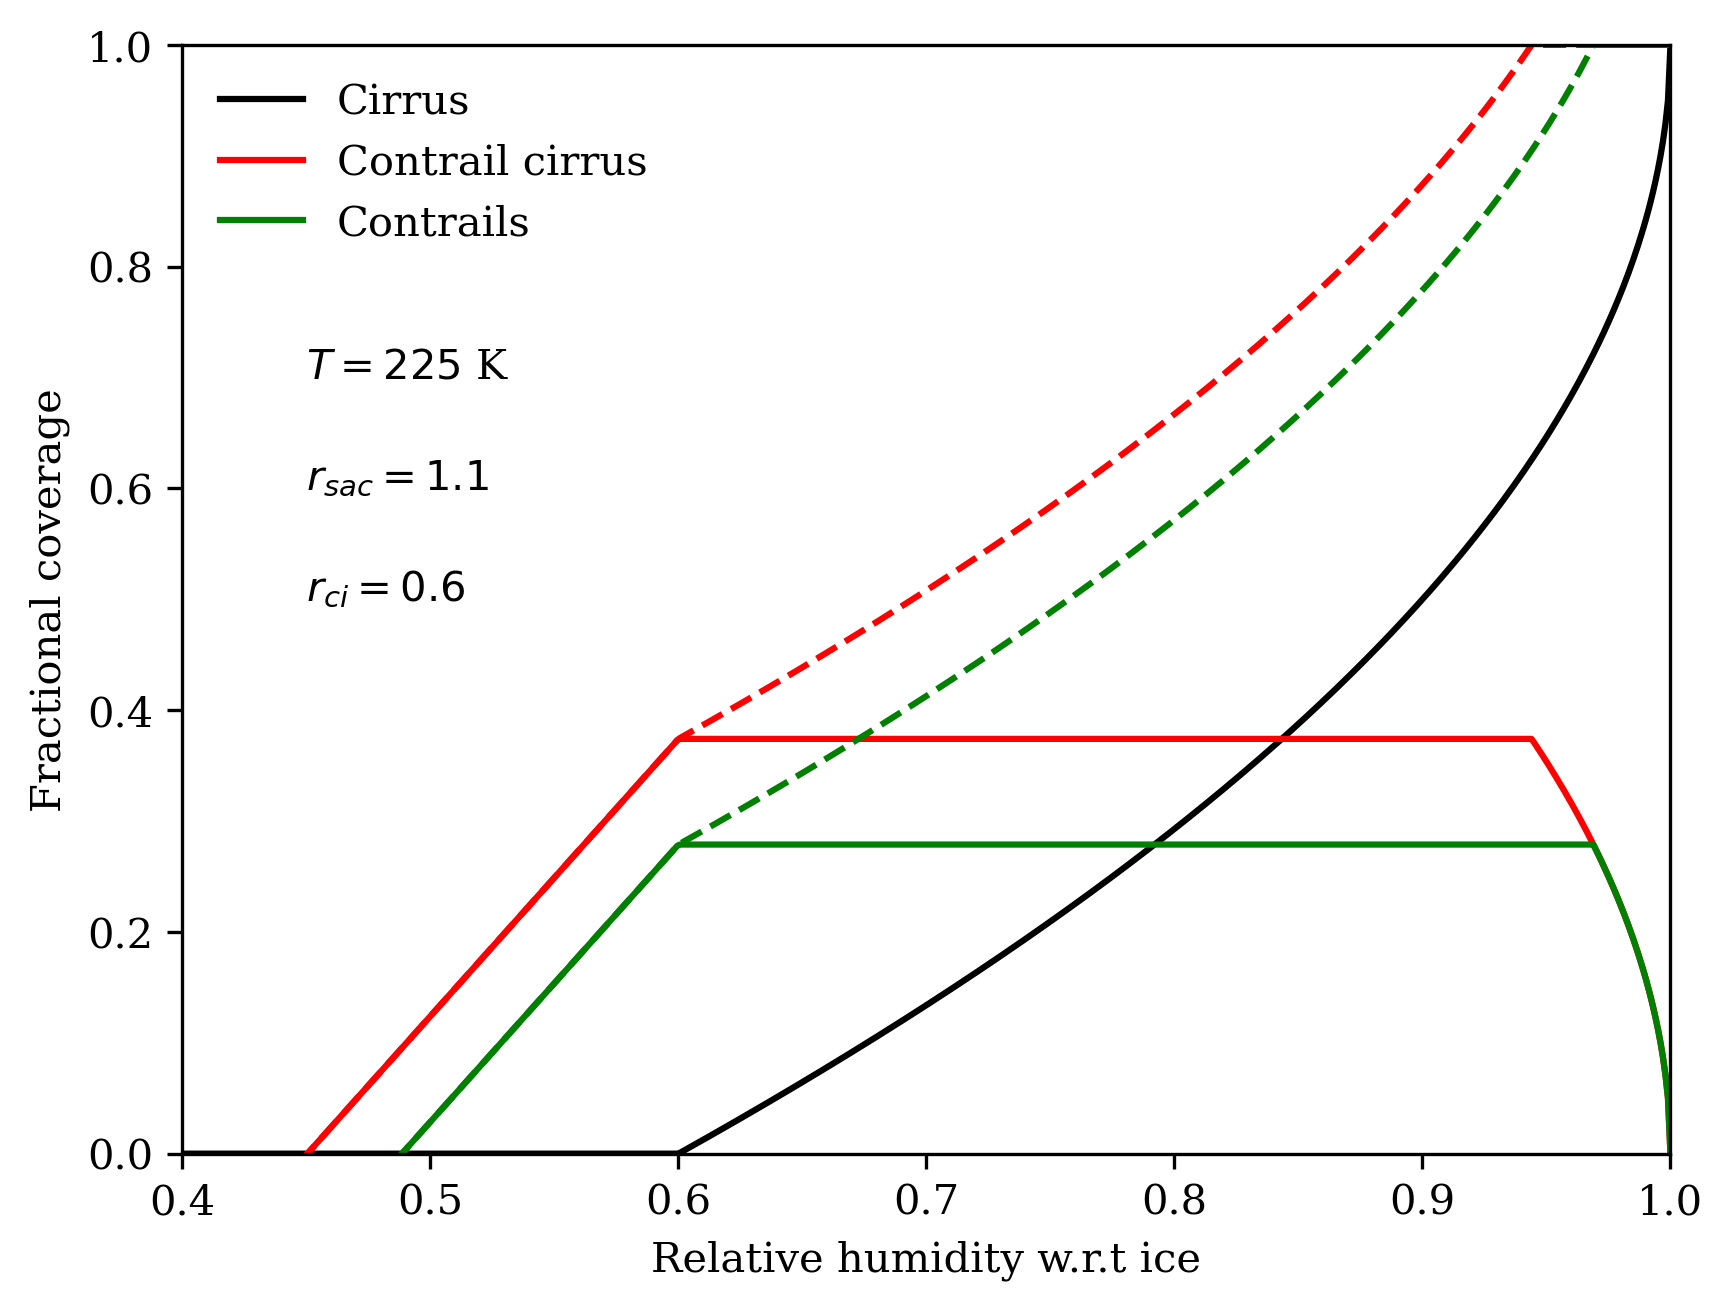

In [2]:
fig, ax = plt.subplots(dpi=300)


# Horizontal axis variable
RHi = np.linspace(0, 1, 1000)


# Ambient conditions and engine + fuel parameters
T_amb = 225
p_amb = 250e2
η = 0.3
EI_H2O = 1.23
LHV = 43.2e6

# Compute parameters relevant for contrail formation
G = sac.slope_mixing_line(np.zeros(1), p_amb, η, EI_H2O, LHV)
T_sat_liquid = sac.T_sat_liquid(G)
rh_crit = sac.rh_critical_sac(T_amb * np.ones(1), T_sat_liquid, G)
rhi_crit = rh_crit * thermo.e_sat_liquid(T_amb) / thermo.e_sat_ice(T_amb)

# Compute threshold relative humdities w.r.t. ice (RHi)

RHi_nuc = get_RHi_nuc(T_amb)
RHi_ci = 0.6
a = 0.9

# Threshold RHi for contrail cirrus
RHi_cc = RHi_ci / (a * RHi_nuc)

# Threshold RHi for contrail formation
RHi_co = RHi_cc * rhi_crit

# Compute coverage quantities
b_ci = np.maximum(0, get_cirrus_coverage(RHi)) # Natural cirrus coverage
b_cc_ci = get_contrail_cirrus_coverage(RHi, RHi_cc=RHi_cc) # Contrail cirrus + cirrus
b_co_ci = get_contrail_cirrus_coverage(RHi, RHi_cc=RHi_co) # Contrail + cirrus
b_cc = b_cc_ci - b_ci
b_co = b_co_ci - b_ci



ax.plot(RHi, b_ci, label="Cirrus", color="k")
ax.plot(RHi, b_cc_ci, color='r', linestyle='dashed')
ax.plot(RHi, b_cc, color='r', label="Contrail cirrus")
ax.plot(RHi, b_co_ci, color='g', linestyle='dashed')
ax.plot(RHi, b_co, color='g', label="Contrails")


ax.set_xlim(0.4,1)
ax.set_ylim(0,1)
ax.set(ylabel="Fractional coverage")
ax.set(xlabel="Relative humidity w.r.t ice")

ax.legend(frameon=False)
ax.annotate(fr"$T={T_amb}$ K", (0.45, 0.7))
ax.annotate(r"$r_{sac}$" + fr"$={rhi_crit[0]:.1f}$", (0.45, 0.6))
ax.annotate(r"$r_{ci}$" + fr"$={RHi_ci}$", (0.45, 0.5))

# Interactive version of plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def plot_contrail_cirrus(T_amb, p_amb):
    fig, ax = plt.subplots(dpi=300)

    # Horizontal axis variable
    RHi = np.linspace(0, 1, 1000)

    # Ambient conditions and engine + fuel parameters
    η = 0.3
    EI_H2O = 1.23
    LHV = 43.2e6

    # Compute parameters relevant for contrail formation
    G = sac.slope_mixing_line(np.zeros(1), p_amb, η, EI_H2O, LHV)
    T_sat_liquid = sac.T_sat_liquid(G)
    rh_crit = sac.rh_critical_sac(T_amb * np.ones(1), T_sat_liquid, G)
    rhi_crit = np.maximum(1.0, rh_crit * thermo.e_sat_liquid(T_amb) / thermo.e_sat_ice(T_amb))

    # Compute threshold relative humdities w.r.t. ice (RHi)
    RHi_nuc = get_RHi_nuc(T_amb)
    RHi_ci = 0.6
    a = 0.9

    # Threshold RHi for contrail cirrus
    RHi_cc = RHi_ci / (a * RHi_nuc)

    # Threshold RHi for contrail formation
    RHi_co = RHi_cc * rhi_crit

    # Compute coverage quantities
    b_ci = np.maximum(0, get_cirrus_coverage(RHi))  # Natural cirrus coverage
    b_cc_ci = get_contrail_cirrus_coverage(RHi, RHi_cc=RHi_cc)  # Contrail cirrus + cirrus
    b_co_ci = get_contrail_cirrus_coverage(RHi, RHi_cc=RHi_co)  # Contrail + cirrus
    b_cc = b_cc_ci - b_ci
    b_co = b_co_ci - b_ci

    ax.plot(RHi, b_ci, label="Cirrus", color="k")
    ax.plot(RHi, b_co_ci, color='g', linestyle='dashed')
    ax.plot(RHi, b_co, color='g', label="Contrails")
    ax.plot(RHi, b_cc_ci, color='r', linestyle='dashed')
    ax.plot(RHi, b_cc, color='r', label="Contrail cirrus")
    

    ax.set_xlim(0.4, 1)
    ax.set_ylim(0, 1)
    ax.set(ylabel="Fractional coverage")
    ax.set(xlabel="Relative humidity w.r.t ice")
    ax.legend(frameon=False)
    ax.annotate(fr"$T={T_amb}$ K", (0.45, 0.7))
    ax.annotate(r"$r_{sac}$" + fr"$={rhi_crit[0]:.1f}$", (0.45, 0.6))
    ax.annotate(r"$r_{ci}$" + fr"$={RHi_ci}$", (0.45, 0.5))
    plt.show()

interact(plot_contrail_cirrus, T_amb=(200, 238, 1), p_amb=(200e2, 450e2, 50e2))


interactive(children=(IntSlider(value=219, description='T_amb', max=238, min=200), FloatSlider(value=30000.0, …

<function __main__.plot_contrail_cirrus(T_amb, p_amb)>